Reto -> Entrega 1 Limpieza, Analisis, Visualizacion y Kmeans

*   Kevin Molina A01793687 
*   Kevin Melendez A01793653

Materia: Ciencia y Analitica de Datos

Fecha: 16-11-2022



Limpieza, análisis, visualización y agrupamiento.
En esta base de datos encontraras:

Aguas subterraneas.
Aguas superficiales.

Elige una base de datos, ya sea la de aguas superficiales o la de aguas subterraneas.

*   Limpieza de base de datos
*   Explorar  cada datos (auxiliate de describe(), mean(), plot, boxplot de pandas):
*   Identificando tendencias centrales promedio, media y mediana de los datos. Identificar medidas de dispersión, máximo, mínimo .
*   Identificar medidas de posición no centrales , los cuartiles , outliers.  Identificar correlaciones.
*   Preparar los datos 
*   Realizar análisis para encontrar si existe una relación entre la calidad del agua y su ubicación geográfica a través de K- means.
*   Mostrar resultados de agrupamiento de latitudes y longitudes con K means en el mapa de México.


In [51]:
import pandas as pd
import numpy as np
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import os
import math 
import matplotlib.pyplot as plt
import requests, zipfile #Librerira para zip de nuestros origen de datos
from io import BytesIO

from imblearn.metrics import geometric_mean_score, classification_report_imbalanced
from google.colab import drive

from sklearn.model_selection import learning_curve, validation_curve
from sklearn.preprocessing import QuantileTransformer #Libreria para graficar datos
from sklearn.preprocessing import power_transform #Libreria para graficar datos
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split #Libreria para hacer particiones
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score         
from sklearn.metrics import classification_report, make_scorer
from sklearn.model_selection import  cross_validate,  RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.compose import TransformedTargetRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RepeatedKFold

In [52]:
#Instalamos libreria para trabajar con mapas
! pip install qeds fiona geopandas xgboost gensim folium pyLDAvis descartes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import geopandas as gpd
from shapely.geometry import Point

In [53]:
from google.colab import drive

drive.mount("/content/drive/")
DIR = "/content/drive/MyDrive/Datos_de_calidad_del_agua_2020"
os.chdir(DIR)
df_sub= pd.read_csv("Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_subterraneas_2020.csv", encoding = 'latin1')
df_sub

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,...,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.02210,22.20887,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
1,DLAGU6516,POZO R013 CAÑADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.20075,21.99958,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
2,DLAGU7,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.28801,22.36685,2020,...,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI
3,DLAGU9,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.29449,22.18435,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
4,DLBAJ107,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.24480,23.45138,2020,...,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,OCRBR5101M1,L-310 (COMUNIDAD SAN MANUEL),RIO BRAVO,NUEVO LEON,LINARES,CITRICOLA SUR,POZO,-99.54191,24.76036,2020,...,NO,SI,NO,SI,SI,SI,SI,SI,SI,SI
1064,OCRBR5102M1,L-305 (EJIDO OJO DE AGUA LAS CRUCESITAS),RIO BRAVO,NUEVO LEON,LINARES,CITRICOLA SUR,POZO,-99.70099,24.78280,2020,...,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI
1065,OCRBR5105M2,HACIENDA MEXIQUITO POZO 01,RIO BRAVO,NUEVO LEON,CADEREYTA JIMENEZ,CITRICOLA NORTE,POZO,-99.82249,25.55197,2020,...,NO,SI,NO,SI,SI,SI,SI,SI,SI,SI
1066,OCRBR5106M1,COMUNIDAD LOS POCITOS,RIO BRAVO,NUEVO LEON,GALEANA,NAVIDAD-POTOSI-RAICES,POZO,-100.32683,24.80118,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI


In [54]:
#Realizamos el analisis de los datos para verificar como procedemos con la limpieza
df_aguas = df_sub.copy()
df_aguas.describe()

,LONGITUD,LATITUD,PERIODO,ALC_mg/L,CONDUCT_mS/cm,SDT_mg/L
count,1068.000000,1068.000000,1068.0,1064.000000,1062.000000,0.0
mean,-101.891007,23.163618,2020.0,235.633759,1138.953013,NaN
std,6.703263,3.887670,0.0,116.874291,1245.563674,NaN
min,-116.664250,14.561150,2020.0,26.640000,50.400000,NaN
25%,-105.388865,20.212055,2020.0,164.000000,501.750000,NaN
50%,-102.174180,22.617190,2020.0,215.527500,815.000000,NaN
75%,-98.974716,25.510285,2020.0,292.710000,1322.750000,NaN
max,-86.864120,32.677713,2020.0,1650.000000,18577.000000,NaN


In [55]:
df_aguas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 57 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CLAVE                 1068 non-null   object 
 1   SITIO                 1068 non-null   object 
 2   ORGANISMO_DE_CUENCA   1068 non-null   object 
 3   ESTADO                1068 non-null   object 
 4   MUNICIPIO             1068 non-null   object 
 5   ACUIFERO              1068 non-null   object 
 6   SUBTIPO               1068 non-null   object 
 7   LONGITUD              1068 non-null   float64
 8   LATITUD               1068 non-null   float64
 9   PERIODO               1068 non-null   int64  
 10  ALC_mg/L              1064 non-null   float64
 11  CALIDAD_ALC           1064 non-null   object 
 12  CONDUCT_mS/cm         1062 non-null   float64
 13  CALIDAD_CONDUC        1062 non-null   object 
 14  SDT_mg/L              0 non-null      float64
 15  SDT_M_mg/L           

In [56]:
df_aguas.columns

Index(['CLAVE', 'SITIO', 'ORGANISMO_DE_CUENCA', 'ESTADO', 'MUNICIPIO',
       'ACUIFERO', 'SUBTIPO', 'LONGITUD', 'LATITUD', 'PERIODO', 'ALC_mg/L',
       'CALIDAD_ALC', 'CONDUCT_mS/cm', 'CALIDAD_CONDUC', 'SDT_mg/L',
       'SDT_M_mg/L', 'CALIDAD_SDT_ra', 'CALIDAD_SDT_salin', 'FLUORUROS_mg/L',
       'CALIDAD_FLUO', 'DUR_mg/L', 'CALIDAD_DUR', 'COLI_FEC_NMP/100_mL',
       'CALIDAD_COLI_FEC', 'N_NO3_mg/L', 'CALIDAD_N_NO3', 'AS_TOT_mg/L',
       'CALIDAD_AS', 'CD_TOT_mg/L', 'CALIDAD_CD', 'CR_TOT_mg/L', 'CALIDAD_CR',
       'HG_TOT_mg/L', 'CALIDAD_HG', 'PB_TOT_mg/L', 'CALIDAD_PB', 'MN_TOT_mg/L',
       'CALIDAD_MN', 'FE_TOT_mg/L', 'CALIDAD_FE', 'SEMAFORO', 'CONTAMINANTES',
       'CUMPLE_CON_ALC', 'CUMPLE_CON_COND', 'CUMPLE_CON_SDT_ra',
       'CUMPLE_CON_SDT_salin', 'CUMPLE_CON_FLUO', 'CUMPLE_CON_DUR',
       'CUMPLE_CON_CF', 'CUMPLE_CON_NO3', 'CUMPLE_CON_AS', 'CUMPLE_CON_CD',
       'CUMPLE_CON_CR', 'CUMPLE_CON_HG', 'CUMPLE_CON_PB', 'CUMPLE_CON_MN',
       'CUMPLE_CON_FE'],
      dtype='

In [57]:
df_aguas.isnull().sum()

CLAVE                      0
SITIO                      0
ORGANISMO_DE_CUENCA        0
ESTADO                     0
MUNICIPIO                  0
ACUIFERO                   0
SUBTIPO                    0
LONGITUD                   0
LATITUD                    0
PERIODO                    0
ALC_mg/L                   4
CALIDAD_ALC                4
CONDUCT_mS/cm              6
CALIDAD_CONDUC             6
SDT_mg/L                1068
SDT_M_mg/L                 2
CALIDAD_SDT_ra             2
CALIDAD_SDT_salin          2
FLUORUROS_mg/L             0
CALIDAD_FLUO               0
DUR_mg/L                   1
CALIDAD_DUR                1
COLI_FEC_NMP/100_mL        0
CALIDAD_COLI_FEC           0
N_NO3_mg/L                 1
CALIDAD_N_NO3              1
AS_TOT_mg/L                0
CALIDAD_AS                 0
CD_TOT_mg/L                0
CALIDAD_CD                 0
CR_TOT_mg/L                0
CALIDAD_CR                 0
HG_TOT_mg/L                0
CALIDAD_HG                 0
PB_TOT_mg/L   

In [58]:
#Valores nolos de mayor a menor
df_aguas.isna().sum().sort_values(ascending=False) 

SDT_mg/L                1068
CONTAMINANTES            434
CALIDAD_CONDUC             6
CONDUCT_mS/cm              6
ALC_mg/L                   4
CALIDAD_ALC                4
CALIDAD_SDT_ra             2
SDT_M_mg/L                 2
CALIDAD_SDT_salin          2
CALIDAD_N_NO3              1
CALIDAD_DUR                1
N_NO3_mg/L                 1
DUR_mg/L                   1
CUMPLE_CON_COND            0
CUMPLE_CON_ALC             0
SEMAFORO                   0
CALIDAD_FE                 0
FE_TOT_mg/L                0
CALIDAD_MN                 0
CUMPLE_CON_SDT_ra          0
CUMPLE_CON_SDT_salin       0
CLAVE                      0
CUMPLE_CON_FLUO            0
CUMPLE_CON_DUR             0
CALIDAD_PB                 0
CUMPLE_CON_CF              0
CUMPLE_CON_NO3             0
CUMPLE_CON_AS              0
CUMPLE_CON_CD              0
CUMPLE_CON_CR              0
CUMPLE_CON_HG              0
CUMPLE_CON_PB              0
CUMPLE_CON_MN              0
MN_TOT_mg/L                0
CD_TOT_mg/L   

In [59]:
#Segmentamos los datos entre categoricos y numericos

#columnas_categorias =

columnas_numericas = ['ALC_mg/L','CONDUCT_mS/cm','SDT_mg/L','SDT_M_mg/L','FLUORUROS_mg/L','DUR_mg/L','COLI_FEC_NMP/100_mL',
                      'N_NO3_mg/L','AS_TOT_mg/L','CD_TOT_mg/L','CR_TOT_mg/L','HG_TOT_mg/L','PB_TOT_mg/L','MN_TOT_mg/L','FE_TOT_mg/L']

df_limpio = df_aguas[['ALC_mg/L','CONDUCT_mS/cm','SDT_mg/L','SDT_M_mg/L','FLUORUROS_mg/L','DUR_mg/L','COLI_FEC_NMP/100_mL',
                      'N_NO3_mg/L','AS_TOT_mg/L','CD_TOT_mg/L','CR_TOT_mg/L','HG_TOT_mg/L','PB_TOT_mg/L','MN_TOT_mg/L','FE_TOT_mg/L']]

df_limpio

,ALC_mg/L,CONDUCT_mS/cm,SDT_mg/L,SDT_M_mg/L,FLUORUROS_mg/L,DUR_mg/L,COLI_FEC_NMP/100_mL,N_NO3_mg/L,AS_TOT_mg/L,CD_TOT_mg/L,CR_TOT_mg/L,HG_TOT_mg/L,PB_TOT_mg/L,MN_TOT_mg/L,FE_TOT_mg/L
0,229.990,940.0,NaN,603.6,0.9766,213.732,<1.1,4.184656,0.0161,<0.003,<0.005,<0.0005,<0.005,<0.0015,0.0891
1,231.990,608.0,NaN,445.4,0.9298,185.0514,<1.1,5.75011,0.0134,<0.003,<0.005,<0.0005,<0.005,<0.0015,<0.025
2,204.920,532.0,NaN,342,1.8045,120.719,<1.1,1.449803,0.037,<0.003,<0.005,<0.0005,<0.005,<0.0015,<0.025
3,327.000,686.0,NaN,478.6,1.1229,199.879,<1.1,1.258597,0.0154,<0.003,0.005,<0.0005,<0.005,<0.0015,<0.025
4,309.885,1841.0,NaN,1179,0.2343,476.9872,291,15.672251,<0.01,<0.003,<0.005,<0.0005,<0.005,<0.0015,<0.025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,231.045,2350.0,NaN,1545.8,<0.2,752.096,<1.1,14.615488,<0.01,<0.003,<0.005,<0.0005,<0.005,<0.0015,<0.025
1064,256.000,529.0,NaN,297,<0.2,273,<1.1,77.392,<0.01,<0.003,<0.005,<0.0005,<0.005,0.00709,0.07578
1065,330.690,2600.0,NaN,1873,0.7574,660.2126,620,36.477104,<0.01,<0.003,<0.005,<0.0005,<0.005,0.0242,0.2129
1066,193.140,873.0,NaN,690.6667,0.7108,406.368,<1.1,<0.02,<0.01,<0.003,<0.005,<0.0005,<0.005,0.012,0.1786


In [61]:
print(df_limpio['SDT_mg/L'].unique())
print(df_limpio['SDT_mg/L'].value_counts())

[nan]
Series([], Name: SDT_mg/L, dtype: int64)


In [62]:
columnas_numericas = ['ALC_mg/L','CONDUCT_mS/cm','SDT_mg/L','SDT_M_mg/L','FLUORUROS_mg/L','DUR_mg/L','COLI_FEC_NMP/100_mL',
                      'N_NO3_mg/L','AS_TOT_mg/L','CD_TOT_mg/L','CR_TOT_mg/L','HG_TOT_mg/L','PB_TOT_mg/L','MN_TOT_mg/L','FE_TOT_mg/L']
for i in columnas_numericas:
  print(" nombre de la columna -------------------------" + i)
  print(" sumatoria por valores uncos--------------------") 
  print(df_limpio[i].value_counts())

'''for i in df.columns:
    print("nombre de la columna", df[i].column)
    print("Valores unicos", df[i].unique())'''

 nombre de la columna -------------------------ALC_mg/L
 sumatoria por valores uncos--------------------
157.620    5
193.815    4
195.360    4
204.765    4
257.850    4
          ..
341.000    1
151.000    1
106.000    1
99.000     1
256.000    1
Name: ALC_mg/L, Length: 816, dtype: int64
 nombre de la columna -------------------------CONDUCT_mS/cm
 sumatoria por valores uncos--------------------
777.0    6
300.0    4
412.0    4
454.0    4
308.0    4
        ..
826.0    1
876.0    1
373.0    1
733.0    1
817.0    1
Name: CONDUCT_mS/cm, Length: 801, dtype: int64
 nombre de la columna -------------------------SDT_mg/L
 sumatoria por valores uncos--------------------
Series([], Name: SDT_mg/L, dtype: int64)
 nombre de la columna -------------------------SDT_M_mg/L
 sumatoria por valores uncos--------------------
496         4
320         4
292         4
317         4
380         4
           ..
148         1
224         1
392         1
1736        1
690.6667    1
Name: SDT_M_mg/L, Length:

'for i in df.columns:\n    print("nombre de la columna", df[i].column)\n    print("Valores unicos", df[i].unique())'

<class 'pandas.core.frame.DataFrame'>


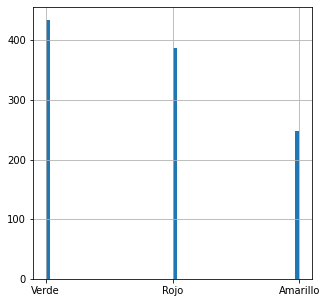

In [63]:
y= pd.DataFrame(df_aguas['SEMAFORO'])
y
print(type(y))
y['SEMAFORO'].hist(bins = 60, figsize=(5,5))

In [64]:
columnas_numericas = ['ALC_mg/L','CONDUCT_mS/cm','SDT_mg/L','SDT_M_mg/L','FLUORUROS_mg/L','DUR_mg/L','COLI_FEC_NMP/100_mL',
                      'N_NO3_mg/L','AS_TOT_mg/L','CD_TOT_mg/L','CR_TOT_mg/L','HG_TOT_mg/L','PB_TOT_mg/L','MN_TOT_mg/L','FE_TOT_mg/L']

#Convertimos nuestros datos de objeto hacia flotante remplazando los valores

for name in columnas_numericas:
  df_limpio[name] = df_limpio[name].astype('str')
  df_limpio[name] = df_limpio[name].str.replace('<25','25') 
  df_limpio[name] = df_limpio[name].str.replace('<0.2','0.2') 
  df_limpio[name] = df_limpio[name].str.replace('<20','20') 
  df_limpio[name] = df_limpio[name].str.replace('<1.1','1.1')
  df_limpio[name] = df_limpio[name].str.replace('<0.02','0.02') 
  df_limpio[name] = df_limpio[name].str.replace('<0.01','0.01') 
  df_limpio[name] = df_limpio[name].str.replace('<0.003','0.003')
  df_limpio[name] = df_limpio[name].str.replace('<0.005','0.004') 
  df_limpio[name] = df_limpio[name].str.replace('<0.0005','0.0004') 
  df_limpio[name] = df_limpio[name].str.replace('<0.0015','0.0015') 
  df_limpio[name] = df_limpio[name].str.replace('<0.025','0.025')  
  df_limpio[name]= df_limpio[name].astype('float')

df_limpio.info()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: The default value of regex will change from True to False in a future version.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A va

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ALC_mg/L             1064 non-null   float64
 1   CONDUCT_mS/cm        1062 non-null   float64
 2   SDT_mg/L             0 non-null      float64
 3   SDT_M_mg/L           1066 non-null   float64
 4   FLUORUROS_mg/L       1068 non-null   float64
 5   DUR_mg/L             1067 non-null   float64
 6   COLI_FEC_NMP/100_mL  1068 non-null   float64
 7   N_NO3_mg/L           1067 non-null   float64
 8   AS_TOT_mg/L          1068 non-null   float64
 9   CD_TOT_mg/L          1068 non-null   float64
 10  CR_TOT_mg/L          1068 non-null   float64
 11  HG_TOT_mg/L          1068 non-null   float64
 12  PB_TOT_mg/L          1068 non-null   float64
 13  MN_TOT_mg/L          1068 non-null   float64
 14  FE_TOT_mg/L          1068 non-null   float64
dtypes: float64(15)
memory usage: 125.3 KB


In [65]:
df_limpio.drop('SDT_mg/L', axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [66]:
print(df_limpio.columns)
print(df_limpio.info())
print(df_limpio.isnull().sum())

Index(['ALC_mg/L', 'CONDUCT_mS/cm', 'SDT_M_mg/L', 'FLUORUROS_mg/L', 'DUR_mg/L',
       'COLI_FEC_NMP/100_mL', 'N_NO3_mg/L', 'AS_TOT_mg/L', 'CD_TOT_mg/L',
       'CR_TOT_mg/L', 'HG_TOT_mg/L', 'PB_TOT_mg/L', 'MN_TOT_mg/L',
       'FE_TOT_mg/L'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ALC_mg/L             1064 non-null   float64
 1   CONDUCT_mS/cm        1062 non-null   float64
 2   SDT_M_mg/L           1066 non-null   float64
 3   FLUORUROS_mg/L       1068 non-null   float64
 4   DUR_mg/L             1067 non-null   float64
 5   COLI_FEC_NMP/100_mL  1068 non-null   float64
 6   N_NO3_mg/L           1067 non-null   float64
 7   AS_TOT_mg/L          1068 non-null   float64
 8   CD_TOT_mg/L          1068 non-null   float64
 9   CR_TOT_mg/L          1068 non-null   float64
 10  HG_TOT_mg/L          1

In [68]:
#Una vez que nuestra data esta limpia, procedemos a determinar si hacer imputaciones o borrar 

df_limpio

columnas_numericas_new= ['ALC_mg/L','CONDUCT_mS/cm','SDT_M_mg/L','FLUORUROS_mg/L','DUR_mg/L','COLI_FEC_NMP/100_mL',
                      'N_NO3_mg/L','AS_TOT_mg/L','CD_TOT_mg/L','CR_TOT_mg/L','HG_TOT_mg/L','PB_TOT_mg/L','MN_TOT_mg/L','FE_TOT_mg/L'] #sin ,'SDT_mg/L'
'''
for name in columnas_numericas_new:
  mean = df_limpio[name].mean() 
  df_limpio[name]= df_limpio[name].replace(np.nan, mean)'''

'''
for name in columnas_numericas_new:
  moda_telas = df_limpio[name].mode() 
  df_limpio[name]= df_limpio[name].replace(np.nan, moda_telas)
'''

for name in columnas_numericas_new:
  mediana = df_limpio[name].median() 
  df_limpio[name]= df_limpio[name].replace(np.nan, mediana)

df_limpio.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ALC_mg/L             1068 non-null   float64
 1   CONDUCT_mS/cm        1068 non-null   float64
 2   SDT_M_mg/L           1068 non-null   float64
 3   FLUORUROS_mg/L       1068 non-null   float64
 4   DUR_mg/L             1068 non-null   float64
 5   COLI_FEC_NMP/100_mL  1068 non-null   float64
 6   N_NO3_mg/L           1068 non-null   float64
 7   AS_TOT_mg/L          1068 non-null   float64
 8   CD_TOT_mg/L          1068 non-null   float64
 9   CR_TOT_mg/L          1068 non-null   float64
 10  HG_TOT_mg/L          1068 non-null   float64
 11  PB_TOT_mg/L          1068 non-null   float64
 12  MN_TOT_mg/L          1068 non-null   float64
 13  FE_TOT_mg/L          1068 non-null   float64
dtypes: float64(14)
memory usage: 116.9 KB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

In [69]:
#Ya tenemos la data limpia
print(df_limpio.describe())

#transposicion
df_limpio.describe().T

          ALC_mg/L  CONDUCT_mS/cm    SDT_M_mg/L  FLUORUROS_mg/L     DUR_mg/L  \
count  1068.000000    1068.000000   1068.000000     1068.000000  1068.000000   
mean    235.558455    1137.133052    895.454185        1.075600   347.842003   
std     116.661485    1242.292889   2748.991295        1.924278   359.514579   
min      26.640000      50.400000     25.000000        0.200000    20.000000   
25%     164.048750     505.500000    337.700000        0.267175   121.274100   
50%     215.527500     815.000000    550.400000        0.503500   245.335800   
75%     292.423750    1321.250000    915.900000        1.139850   453.930000   
max    1650.000000   18577.000000  82170.000000       34.803300  3810.692200   

       COLI_FEC_NMP/100_mL   N_NO3_mg/L  AS_TOT_mg/L  CD_TOT_mg/L  \
count          1068.000000  1068.000000  1068.000000  1068.000000   
mean            355.490356     4.317663     0.019618     0.003030   
std            2052.457014     8.341504     0.035209     0.000894   
min

,count,mean,std,min,25%,50%,75%,max
ALC_mg/L,1068.0,235.558455,116.661485,26.6400,164.048750,215.527500,292.423750,1650.000000
CONDUCT_mS/cm,1068.0,1137.133052,1242.292889,50.4000,505.500000,815.000000,1321.250000,18577.000000
SDT_M_mg/L,1068.0,895.454185,2748.991295,25.0000,337.700000,550.400000,915.900000,82170.000000
FLUORUROS_mg/L,1068.0,1.075600,1.924278,0.2000,0.267175,0.503500,1.139850,34.803300
DUR_mg/L,1068.0,347.842003,359.514579,20.0000,121.274100,245.335800,453.930000,3810.692200
COLI_FEC_NMP/100_mL,1068.0,355.490356,2052.457014,1.1000,1.100000,1.100000,13.250000,24196.000000
N_NO3_mg/L,1068.0,4.317663,8.341504,0.0200,0.650932,2.080932,5.200047,121.007813
AS_TOT_mg/L,1068.0,0.019618,0.035209,0.0100,0.010000,0.010000,0.010000,0.452200
CD_TOT_mg/L,1068.0,0.003030,0.000894,0.0030,0.003000,0.003000,0.003000,0.032110
CR_TOT_mg/L,1068.0,0.012476,0.154435,0.0040,0.004000,0.004000,0.004000,5.003200


In [70]:
#Matriz de correlacion
df_limpio.corr()

,ALC_mg/L,CONDUCT_mS/cm,SDT_M_mg/L,FLUORUROS_mg/L,DUR_mg/L,COLI_FEC_NMP/100_mL,N_NO3_mg/L,AS_TOT_mg/L,CD_TOT_mg/L,CR_TOT_mg/L,HG_TOT_mg/L,PB_TOT_mg/L,MN_TOT_mg/L,FE_TOT_mg/L
ALC_mg/L,1.000000,0.217212,0.079572,0.068860,0.243404,-0.016338,-0.000346,0.073458,0.032706,-0.014234,0.069779,0.016989,0.129942,0.043454
CONDUCT_mS/cm,0.217212,1.000000,0.286244,-0.025071,0.692656,0.018021,0.219881,-0.005047,0.029083,0.004436,0.057007,0.024816,0.095940,0.083172
SDT_M_mg/L,0.079572,0.286244,1.000000,-0.013709,0.347211,-0.001102,0.101522,-0.010092,0.010807,-0.000494,0.020332,0.002517,0.018963,0.020103
FLUORUROS_mg/L,0.068860,-0.025071,-0.013709,1.000000,-0.149549,0.003564,-0.019672,0.444079,-0.015123,-0.005205,-0.028597,-0.034191,-0.049742,-0.009994
DUR_mg/L,0.243404,0.692656,0.347211,-0.149549,1.000000,0.031772,0.301581,-0.106417,0.025010,0.007317,0.064998,-0.017304,0.083868,0.059789
COLI_FEC_NMP/100_mL,-0.016338,0.018021,-0.001102,0.003564,0.031772,1.000000,-0.000926,0.038151,-0.001656,-0.008938,-0.008903,0.021451,-0.005326,0.003045
N_NO3_mg/L,-0.000346,0.219881,0.101522,-0.019672,0.301581,-0.000926,1.000000,-0.007950,-0.009353,-0.015157,0.011367,-0.017317,-0.036810,0.013307
AS_TOT_mg/L,0.073458,-0.005047,-0.010092,0.444079,-0.106417,0.038151,-0.007950,1.000000,-0.009078,-0.009698,-0.012593,-0.023608,0.016916,0.014295
CD_TOT_mg/L,0.032706,0.029083,0.010807,-0.015123,0.025010,-0.001656,-0.009353,-0.009078,1.000000,-0.001824,-0.004631,-0.003080,-0.004205,-0.001036
CR_TOT_mg/L,-0.014234,0.004436,-0.000494,-0.005205,0.007317,-0.008938,-0.015157,-0.009698,-0.001824,1.000000,0.006998,-0.001149,-0.005112,0.000610


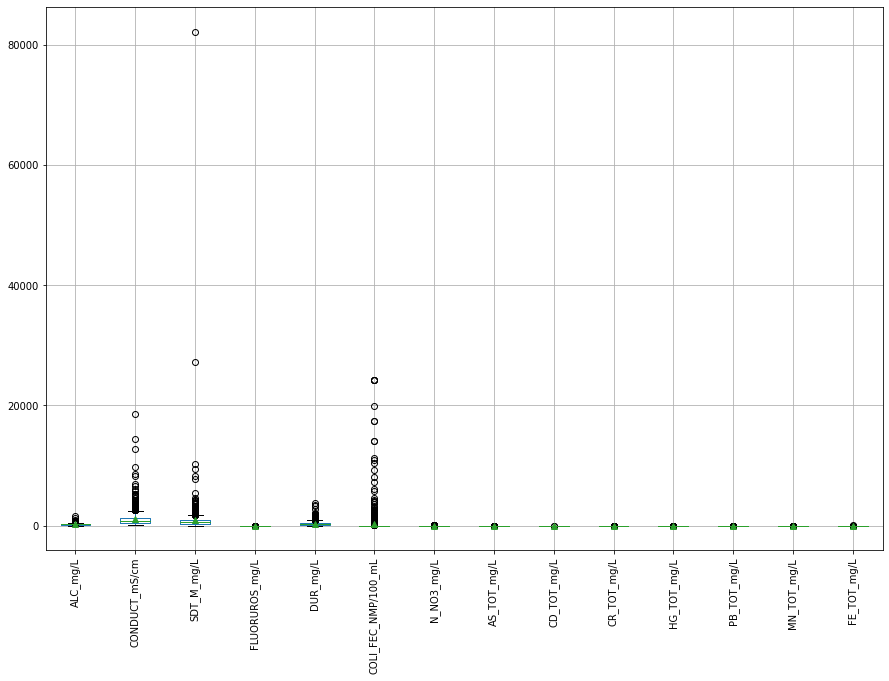

In [73]:
#Diagrama de caja para verificar outliers
outliers = df_limpio.boxplot(figsize = (15,10),showmeans = True)
outliers.plot()
plt.xticks(rotation=90)
plt.show()

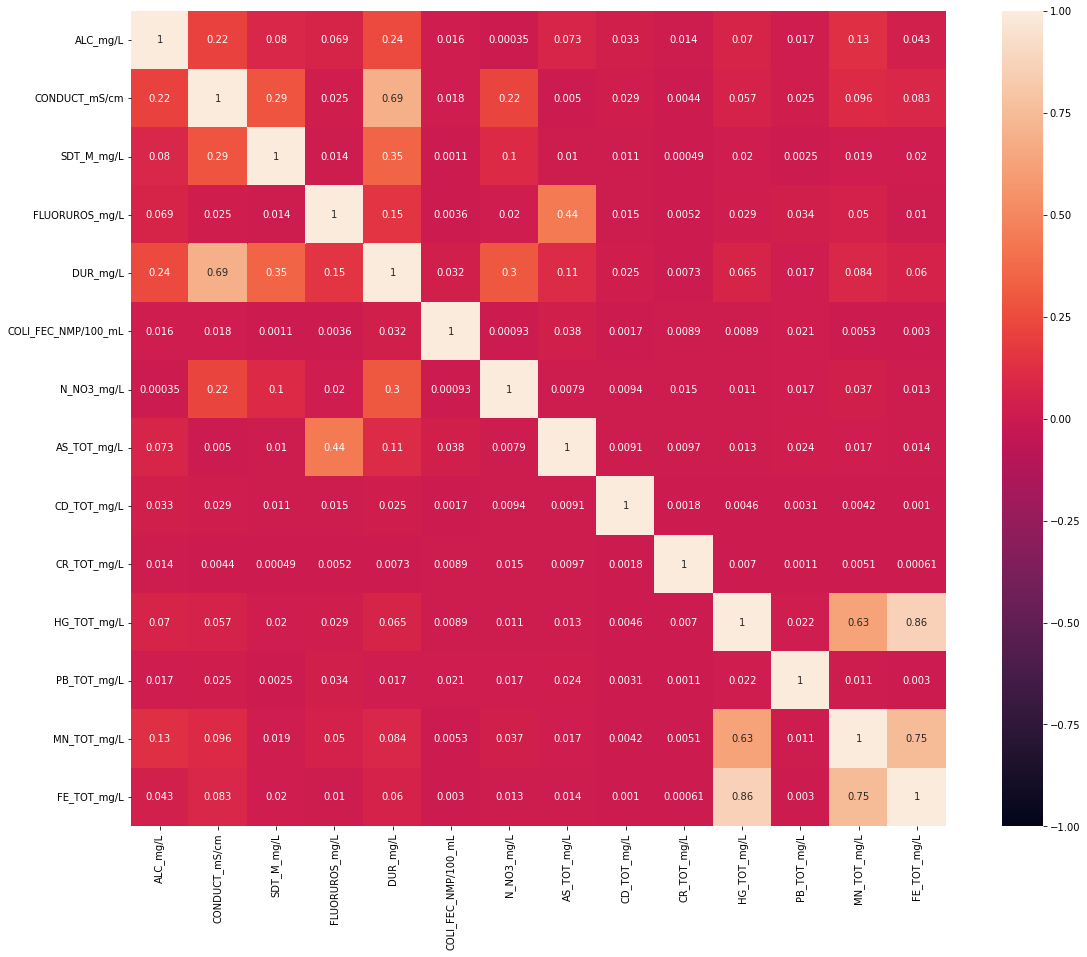

In [75]:
#Procedemos a realizar la matriz de correlacion
correlacion = df_limpio.corr().abs() 

f, ax = plt.subplots(figsize = (20,15))

sns.heatmap(correlacion, vmax = 1, vmin = -1, square = True, annot = True)

A continuacion realizamos el analisis para verificar si existe relacion entre la cantidad de agua y la ubicacion geografica utilizando Kmeans. 

Mostramos los resultados de agrupamiento de latitudes y longitudes con Kmeans en Mexico.

In [76]:
#Verificamos cuales variables definen la calidad del agua y cuales definen la ubicacion geografica

#variables de ubicacion geografica
df_ubicacion = df_aguas[['LONGITUD','LATITUD']]
df_ubicacion

#Variables calidad del agua
y

,SEMAFORO
0,Verde
1,Verde
2,Rojo
3,Verde
4,Rojo
...,...
1063,Rojo
1064,Rojo
1065,Rojo
1066,Verde


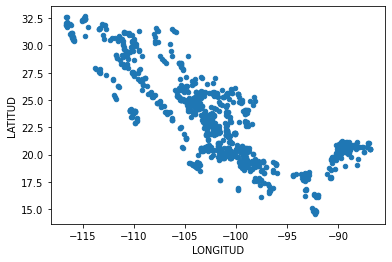

In [77]:
#Vamos a ver las coordenandas de nuetro data frame en el mapa geopandas

df_ubicacion.plot.scatter('LONGITUD','LATITUD')


In [78]:
#Creamos la columna de las coordenadas
df_ubicacion
df_ubicacion["COORDENADAS"] = list(zip(df_ubicacion.LONGITUD, df_ubicacion.LATITUD))
df_ubicacion["COORDENADAS"] = df_ubicacion["COORDENADAS"].apply(Point)
df_ubicacion.head()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,LONGITUD,LATITUD,COORDENADAS
0,-102.02210,22.20887,POINT (-102.0221 22.20887)
1,-102.20075,21.99958,POINT (-102.20075 21.99958)
2,-102.28801,22.36685,POINT (-102.28801 22.36685)
3,-102.29449,22.18435,POINT (-102.29449 22.18435)
4,-110.24480,23.45138,POINT (-110.2448 23.45138)


,LONGITUD,LATITUD,COORDENADAS
0,-102.02210,22.20887,POINT (-102.02210 22.20887)
1,-102.20075,21.99958,POINT (-102.20075 21.99958)
2,-102.28801,22.36685,POINT (-102.28801 22.36685)
3,-102.29449,22.18435,POINT (-102.29449 22.18435)
4,-110.24480,23.45138,POINT (-110.24480 23.45138)
...,...,...,...
1063,-99.54191,24.76036,POINT (-99.54191 24.76036)
1064,-99.70099,24.78280,POINT (-99.70099 24.78280)
1065,-99.82249,25.55197,POINT (-99.82249 25.55197)
1066,-100.32683,24.80118,POINT (-100.32683 24.80118)


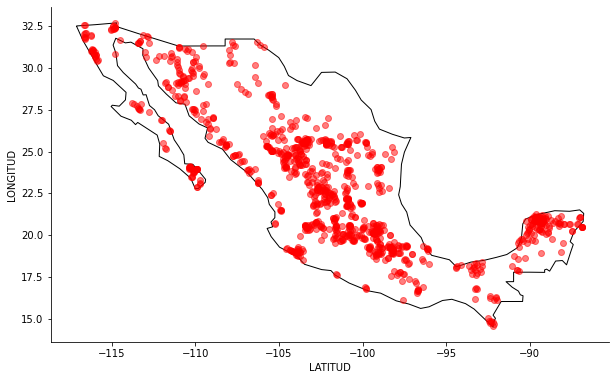

In [79]:
puntos_en_mapa = gpd.GeoDataFrame(df_ubicacion, geometry="COORDENADAS")

world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

world = world.set_index("iso_a3")
world.name.unique()
fig, gax = plt.subplots(figsize=(10,10))

world.query("name == 'Mexico'").plot(ax=gax, edgecolor='black',color='white')

gax.set_xlabel('LATITUD')
gax.set_ylabel('LONGITUD')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

puntos_en_mapa.plot(ax=gax, color='red', alpha = 0.5)
puntos_en_mapa

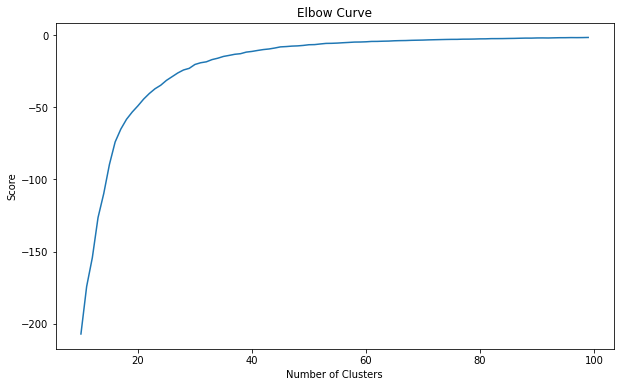

In [80]:
#Kmeans
#Agrupamos por color y agrupamos por ubicacion

from sklearn.cluster import KMeans

numero_de_closters = range(10,100) 
mi_kmeans = [KMeans(n_clusters=i) for i in numero_de_closters]
Y_axis = df_ubicacion[['LATITUD']]
X_axis = df_ubicacion[['LONGITUD']]
calulo_kmeans = [mi_kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(mi_kmeans))]

#Visualize

plt.figure(figsize=(10,6))
plt.plot(numero_de_closters, calulo_kmeans)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')

plt.show()


In [81]:
#Hacemos plot a los clusters

X = df_sub[['LONGITUD', 'LATITUD']]

kmeans = KMeans(n_clusters=20).fit(X)
#Determinamos los centroides
centroids = kmeans.cluster_centers_ 
labels = kmeans.predict(X)
#Traemos valores a los centroides
C = kmeans.cluster_centers_ 

#Convertimos en Dataframe
C_DF = pd.DataFrame(C) 
#Convertimos en Lista
C_DF["Coordinates"] = list(zip(C_DF[0], C_DF[1]))
#Convertimos en puntos para poder graficar
C_DF["Coordinates"] = C_DF["Coordinates"].apply(Point)

puntos_centroides = gpd.GeoDataFrame(C_DF, geometry="Coordinates")
puntos_centroides

,0,1,Coordinates
0,-89.188374,20.546897,POINT (-89.18837 20.54690)
1,-106.761409,23.873646,POINT (-106.76141 23.87365)
2,-99.438754,20.077643,POINT (-99.43875 20.07764)
3,-110.788955,29.714956,POINT (-110.78896 29.71496)
4,-103.083837,25.536364,POINT (-103.08384 25.53636)
5,-92.761627,17.004097,POINT (-92.76163 17.00410)
6,-103.764117,19.947591,POINT (-103.76412 19.94759)
7,-100.404164,22.223319,POINT (-100.40416 22.22332)
8,-115.251913,31.614292,POINT (-115.25191 31.61429)
9,-107.281006,30.941352,POINT (-107.28101 30.94135)


In [83]:
#Lista de clusters
len(labels)

1068

In [84]:
#Elementos por cluster
df_sub['SEMAFORO'].value_counts()

Verde       434
Rojo        387
Amarillo    247
Name: SEMAFORO, dtype: int64

In [85]:
print(y.head())
print(df_ubicacion.head())

  SEMAFORO
0    Verde
1    Verde
2     Rojo
3    Verde
4     Rojo
    LONGITUD   LATITUD                  COORDENADAS
0 -102.02210  22.20887  POINT (-102.02210 22.20887)
1 -102.20075  21.99958  POINT (-102.20075 21.99958)
2 -102.28801  22.36685  POINT (-102.28801 22.36685)
3 -102.29449  22.18435  POINT (-102.29449 22.18435)
4 -110.24480  23.45138  POINT (-110.24480 23.45138)


In [86]:
y['SEMAPHORE'] = y['SEMAFORO'].replace(to_replace = "Verde", value = "green")
y['SEMAPHORE'].replace(to_replace = "Rojo", value = "red", inplace=True)
y['SEMAPHORE'].replace(to_replace = "Amarillo", value = "yellow", inplace=True)
y

,SEMAFORO,SEMAPHORE
0,Verde,green
1,Verde,green
2,Rojo,red
3,Verde,green
4,Rojo,red
...,...,...
1063,Rojo,red
1064,Rojo,red
1065,Rojo,red
1066,Verde,green


In [87]:
puntos_en_mapa['LATITUDYLONGITUD'] = puntos_en_mapa['LATITUD'] + puntos_en_mapa['LONGITUD']
diccionario_semaforo = dict(zip(puntos_en_mapa.LATITUDYLONGITUD, y.SEMAPHORE))
diccionario_semaforo

import folium

lat = puntos_en_mapa.iloc[0]['LATITUD']
lng = puntos_en_mapa.iloc[0]['LONGITUD']
map = folium.Map(location=[lng, lat], zoom_start=1)
for _, row in puntos_en_mapa.iterrows():
    folium.CircleMarker(
        location=[row["LATITUD"], row["LONGITUD"]],
        radius=12, 
        weight=2, 
        fill=True, 
        fill_color=diccionario_semaforo[row["LATITUDYLONGITUD"]],
        color=diccionario_semaforo[row["LATITUDYLONGITUD"]]
    ).add_to(map)
color='black'
for _, row in puntos_en_mapa.iterrows():
    folium.CircleMarker(
        location=[row[1], row[0]],
        radius=12, 
        weight=2, 
        fill=True, 
        fill_color=color,
        color=color
    ).add_to(map)
map


In [88]:
df_aguas['CALIDAD_COLI_FEC'].value_counts()


Potable - Excelente        739
Buena calidad              208
Aceptable                   60
Contaminada                 49
Fuertemente contaminada     12
Name: CALIDAD_COLI_FEC, dtype: int64

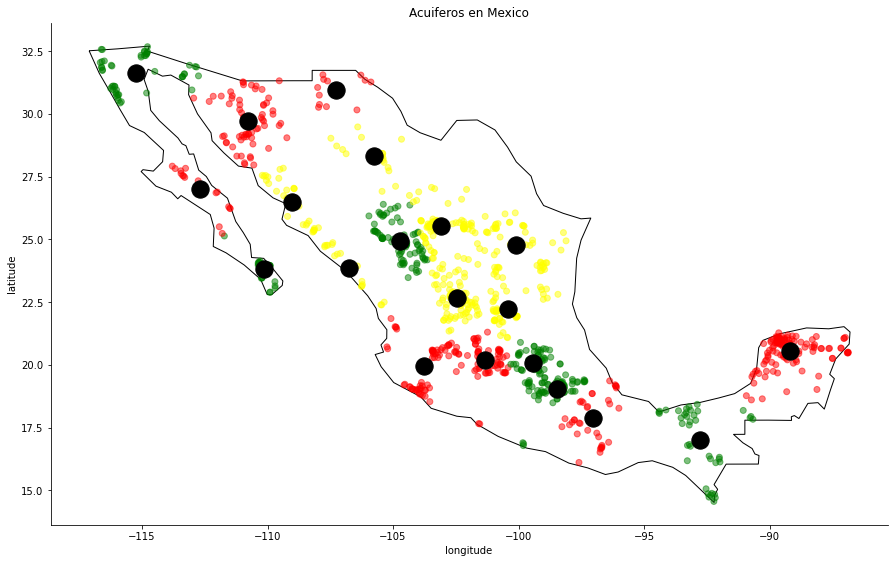

In [92]:
#Ploteamos los centroides

fig, gax = plt.subplots(figsize=(15,10))
colores = ['red','yellow','green','red','yellow','green','red','yellow','green','red','yellow','green','red','yellow','green','red','yellow','green','red','yellow']
color_asig = []

for row in labels:
  color_asig.append(colores[row])

#Filtramos por pais

world.query("name == 'Mexico'").plot(ax = gax, edgecolor='black', color='white') 

puntos_en_mapa.plot(ax=gax, color=color_asig, alpha = 0.5) 
puntos_centroides.plot(ax=gax, color='black', alpha = 1, markersize = 300) 

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Acuiferos en Mexico')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

In [93]:
puntos_en_mapa['COLOR']= y['SEMAFORO']
puntos_en_mapa['CLUSTER'] = labels

puntos_en_mapa

,LONGITUD,LATITUD,COORDENADAS,LATITUDYLONGITUD,COLOR,CLUSTER
0,-102.02210,22.20887,POINT (-102.02210 22.20887),-79.81323,Verde,19
1,-102.20075,21.99958,POINT (-102.20075 21.99958),-80.20117,Verde,19
2,-102.28801,22.36685,POINT (-102.28801 22.36685),-79.92116,Rojo,19
3,-102.29449,22.18435,POINT (-102.29449 22.18435),-80.11014,Verde,19
4,-110.24480,23.45138,POINT (-110.24480 23.45138),-86.79342,Rojo,14
...,...,...,...,...,...,...
1063,-99.54191,24.76036,POINT (-99.54191 24.76036),-74.78155,Rojo,13
1064,-99.70099,24.78280,POINT (-99.70099 24.78280),-74.91819,Rojo,13
1065,-99.82249,25.55197,POINT (-99.82249 25.55197),-74.27052,Rojo,13
1066,-100.32683,24.80118,POINT (-100.32683 24.80118),-75.52565,Verde,13


In [94]:
nuevo_dataset = puntos_en_mapa[puntos_en_mapa.CLUSTER == 0].copy()
nuevo_dataset.shape

(121, 6)

In [95]:
#Sacamos la media de los clusters

lista_de_modas=[]


for i in range(0,20): 
  nuevo_dataset = pd.DataFrame() 
  nuevo_dataset = puntos_en_mapa[puntos_en_mapa.CLUSTER == i].copy() 
  moda = nuevo_dataset['COLOR'].mode()[0] 
  lista_de_modas.append(moda) 

len(lista_de_modas)

20

In [96]:
#Agregamos la columna de la moda
puntos_centroides['MODA'] = lista_de_modas
puntos_centroides

,0,1,Coordinates,MODA
0,-89.188374,20.546897,POINT (-89.18837 20.54690),Amarillo
1,-106.761409,23.873646,POINT (-106.76141 23.87365),Verde
2,-99.438754,20.077643,POINT (-99.43875 20.07764),Verde
3,-110.788955,29.714956,POINT (-110.78896 29.71496),Verde
4,-103.083837,25.536364,POINT (-103.08384 25.53636),Rojo
5,-92.761627,17.004097,POINT (-92.76163 17.00410),Verde
6,-103.764117,19.947591,POINT (-103.76412 19.94759),Rojo
7,-100.404164,22.223319,POINT (-100.40416 22.22332),Rojo
8,-115.251913,31.614292,POINT (-115.25191 31.61429),Amarillo
9,-107.281006,30.941352,POINT (-107.28101 30.94135),Rojo


In [97]:
lista_gringa = []

for i in range(0,20):
  if lista_de_modas[i] == 'Verde':
    lista_gringa.append('green')
  if lista_de_modas[i] == 'Rojo':
    lista_gringa.append('red')
  if lista_de_modas[i] == 'Amarillo':
    lista_gringa.append('yellow')

len(lista_gringa)

20

In [98]:
lista_gringa_individual = []

for i in range(0,1068):
  if puntos_en_mapa.COLOR[i] == 'Verde':
    lista_gringa_individual.append('green')
  if puntos_en_mapa.COLOR[i] == 'Rojo':
    lista_gringa_individual.append('red')
  if puntos_en_mapa.COLOR[i] == 'Amarillo':
    lista_gringa_individual.append('yellow')

len(lista_gringa_individual)

1068

In [99]:
print(puntos_centroides)
print(puntos_en_mapa)

             0          1                  Coordinates      MODA
0   -89.188374  20.546897   POINT (-89.18837 20.54690)  Amarillo
1  -106.761409  23.873646  POINT (-106.76141 23.87365)     Verde
2   -99.438754  20.077643   POINT (-99.43875 20.07764)     Verde
3  -110.788955  29.714956  POINT (-110.78896 29.71496)     Verde
4  -103.083837  25.536364  POINT (-103.08384 25.53636)      Rojo
5   -92.761627  17.004097   POINT (-92.76163 17.00410)     Verde
6  -103.764117  19.947591  POINT (-103.76412 19.94759)      Rojo
7  -100.404164  22.223319  POINT (-100.40416 22.22332)      Rojo
8  -115.251913  31.614292  POINT (-115.25191 31.61429)  Amarillo
9  -107.281006  30.941352  POINT (-107.28101 30.94135)      Rojo
10 -109.032816  26.492841  POINT (-109.03282 26.49284)  Amarillo
11 -104.735655  24.930384  POINT (-104.73565 24.93038)      Rojo
12  -97.017586  17.896362   POINT (-97.01759 17.89636)     Verde
13 -100.095549  24.758617  POINT (-100.09555 24.75862)  Amarillo
14 -110.146688  23.819670

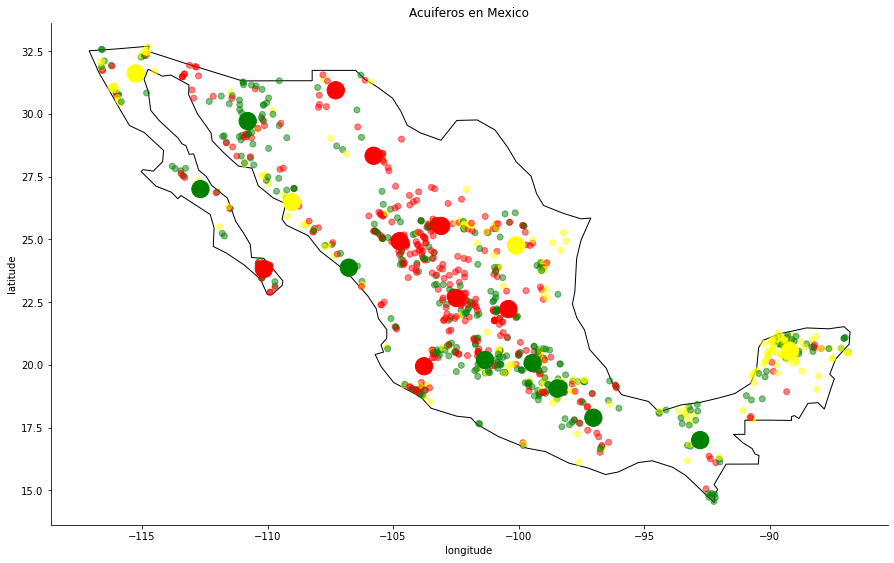

In [100]:
#Ploteamos los Centroides

fig, gax = plt.subplots(figsize=(15,10))
color_asig = []
color_individual = puntos_en_mapa['COLOR']

for row in range(0,len(lista_gringa)):
  color_asig.append(lista_gringa[row])

#Nuevamente Filtramos por pais

world.query("name == 'Mexico'").plot(ax = gax, edgecolor='black', color='white') 

puntos_en_mapa.plot(ax=gax, color=lista_gringa_individual, alpha = 0.5) 
puntos_centroides.plot(ax=gax, color=color_asig, alpha = 1, markersize = 300) 

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Acuiferos en Mexico')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

In [101]:
len(color_asig)

20

In [102]:
df_sub_copy = df_sub.copy(deep=True)
df_sub_copy['CLUSTER'] = labels

_clusters = df_sub_copy.groupby('CLUSTER')['CLUSTER'].count()
print(_clusters)

CLUSTER
0     121
1      22
2      61
3      66
4      87
5      41
6      58
7      49
8      50
9      12
10     31
11     87
12     36
13     56
14     33
15     70
16     21
17     68
18     16
19     83
Name: CLUSTER, dtype: int64


In [105]:
for val, cnt in df_sub_copy.CLUSTER.value_counts().iteritems(): 
    print('Cluster', val, 'was found', cnt, 'times')
    mode = df_sub_copy.loc[df_sub_copy['CLUSTER']== val, 'SEMAFORO'].mode()[0]
    print("The mode is", mode)
    df_sub_copy.loc[df_sub_copy['CLUSTER']== val, 'SEMAFORO'] = mode

df_sub.head()


Cluster 0 was found 121 times
The mode is Amarillo
Cluster 11 was found 87 times
The mode is Rojo
Cluster 4 was found 87 times
The mode is Rojo
Cluster 19 was found 83 times
The mode is Rojo
Cluster 15 was found 70 times
The mode is Verde
Cluster 17 was found 68 times
The mode is Verde
Cluster 3 was found 66 times
The mode is Verde
Cluster 2 was found 61 times
The mode is Verde
Cluster 6 was found 58 times
The mode is Rojo
Cluster 13 was found 56 times
The mode is Amarillo
Cluster 8 was found 50 times
The mode is Amarillo
Cluster 7 was found 49 times
The mode is Rojo
Cluster 5 was found 41 times
The mode is Verde
Cluster 12 was found 36 times
The mode is Verde
Cluster 14 was found 33 times
The mode is Rojo
Cluster 10 was found 31 times
The mode is Amarillo
Cluster 1 was found 22 times
The mode is Verde
Cluster 16 was found 21 times
The mode is Rojo
Cluster 18 was found 16 times
The mode is Verde
Cluster 9 was found 12 times
The mode is Rojo


,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,...,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.02210,22.20887,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
1,DLAGU6516,POZO R013 CAÑADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.20075,21.99958,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
2,DLAGU7,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.28801,22.36685,2020,...,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI
3,DLAGU9,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.29449,22.18435,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
4,DLBAJ107,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.24480,23.45138,2020,...,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI


In [104]:
#https://paratodomexico.com/geografia-de-mexico/hidrografia-de-mexico/acuiferos-de-mexico.html